In [89]:
from tweet import *
from poll import *
from candidate import *
import pandas as pd
import numpy as np
import tweepy
import json
import calendar
import datetime
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
from scipy.stats import iqr, linregress

In [2]:
# Getting polls
# all code copied over from pollster_setup.ipnyb

f_polls = open("dist/poll_data.json")
data = json.load(f_polls)

polls = [None]*(len(data))
for i in range(len(data)):
    polls[i] = (Poll(data[i]))
    
candidate_set = set()
for p in polls:
    p.update_candidates(candidate_set)
    
polls.sort(key = lambda x: x.end_date)

In [3]:
#TODO: Fill this in

consumer_key = "BeC8UJbqCHyX6pTWAvEvvIcGJ"
consumer_secret = "IwEzqplLUKar6MFZ7l828tLbEpxG3ObD49llOSPJ6Y6phKzVYT"
access_token = "727703646331240448-31ZFnJzKYfDcHh3HIgBhd1FfU3W7VaO"
access_token_secret = "GprFSIZ18ukkn9lZb7INfEn78miwkXzWpkzyJ6ocLAg6J"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
month_abbrs = dict((v,k) for k,v in enumerate(calendar.month_abbr))

most_recent_rankings = ['bennet',
                         'castro',
                         'booker',
                         'klobuchar',
                         'gabbard',
                         'yang',
                         'harris',
                         'buttigieg',
                         'warren',
                         'sanders',
                         'biden']

last_name_to_handle = {'bennet': 'MichaelBennet',
                         'castro': 'JulianCastro',
                         'booker': 'CoryBooker',
                         'klobuchar': 'amyklobuchar',
                         'gabbard': 'TulsiGabbard',
                         'yang': 'AndrewYang',
                         'harris': 'KamalaHarris',
                         'buttigieg': 'PeteButtigieg',
                         'warren': 'ewarren',
                         'sanders': 'BernieSanders',
                         'biden': 'JoeBiden'}

handle_to_last_name = {}
for i in last_name_to_handle:
    handle_to_last_name[last_name_to_handle[i].lower()] = i

In [5]:
def get_tweet_time(time_str):
    global month_abbrs
    time_lst = time_str.split(" ")
    year = int(time_lst[-1])
    day = int(time_lst[2])
    month = month_abbrs[time_lst[1]]
    return datetime.date(year, month, day)    

In [6]:
startDate =   datetime.datetime(2019, 9, 13, 0, 0, 0)
# startDate =   datetime.datetime(2019, 11, 1, 0, 0, 0)
endDate = datetime.datetime(2019, 11, 23, 0, 0, 0)
tweets = {}
cand_handles = ['AndrewYang', 'ewarren', 'PeteButtigieg', 'BernieSanders', 
                'MichaelBennet', 'amyklobuchar', 'KamalaHarris', 'TulsiGabbard', 
                'JulianCastro', 'CoryBooker', 'JoeBiden']

for cand_name in cand_handles:
    print(cand_name)
    cand_tweets = []
    tweets[cand_name] = cand_tweets
    try:
        tmpTweets = api.user_timeline(cand_name, tweet_mode='extended')
    except tweepy.TweepError:
        print("tweepyError 2")
        time.sleep(60 * 15)
        continue
    except StopIteration:
        break
    for t in tmpTweets:
        if t.created_at < endDate and t.created_at > startDate:
            cand_tweets.append(t)
    if len(cand_tweets) > 0:
        print(cand_tweets)
    try:
        while (tmpTweets[-1].created_at > startDate):
            print(tmpTweets[-1].created_at)
            tmpTweets = api.user_timeline(cand_name, max_id = tmpTweets[-1].id, tweet_mode='extended')
            for ti in tmpTweets:
                if ti.created_at < endDate and ti.created_at > startDate:
                    t = ti._json
                    if t['full_text'].startswith('RT @'):
                        # skip if a retweet
                        continue
                        
                    tw_obj = Tweet(t['full_text'], get_tweet_time(t['created_at']), cand_name)
                    if not tw_obj.get_clean_text().count(" ") < 15:
                        if 'media' in t['entities']:
                            tw_obj.contains_media()
                        if len(t['entities']['urls']) > 0:
                            tw_obj.contains_link()
                        if t['in_reply_to_screen_name'] and t['in_reply_to_screen_name'] != cand_name:
                            tw_obj.is_response()
                        cand_tweets.append(tw_obj)
    except tweepy.TweepError:
        time.sleep(60 * 15)
        print("tweepyError 2")
        continue
#     except:
#         print(len(cand_tweets))
#         print(len(tmpTweets))

AndrewYang
2019-12-10 15:03:27
2019-12-09 14:13:51
2019-12-08 21:06:50
2019-12-08 18:40:56
2019-12-08 03:46:01
2019-12-07 22:54:19
2019-12-07 17:11:31
2019-12-06 21:06:32
2019-12-06 13:29:40
2019-12-05 22:35:26
2019-12-05 13:49:20
2019-12-04 23:56:46
2019-12-04 18:12:10
2019-12-04 02:16:30
2019-12-03 23:18:20
2019-12-03 05:36:18
2019-12-02 23:22:46
2019-12-02 15:30:06
2019-12-02 03:05:51
2019-12-01 23:00:12
2019-12-01 20:44:46
2019-12-01 18:55:40
2019-12-01 02:00:59
2019-11-30 23:47:24
2019-11-30 01:36:21
2019-11-29 00:56:57
2019-11-28 22:25:46
2019-11-28 18:46:35
2019-11-28 00:28:30
2019-11-27 18:34:00
2019-11-27 06:28:03
2019-11-27 02:48:21
2019-11-26 15:52:57
2019-11-26 03:58:14
2019-11-26 00:32:25
2019-11-25 19:37:42
2019-11-25 03:57:58
2019-11-24 20:10:42
2019-11-23 23:41:41
2019-11-23 03:16:12
2019-11-22 19:07:00
2019-11-22 02:21:33
2019-11-21 18:48:55
2019-11-21 03:54:40
2019-11-21 02:37:32
2019-11-20 05:34:03
2019-11-19 17:23:28
2019-11-18 17:11:37
2019-11-17 20:09:51
2019-11-1

2019-11-01 22:37:20
2019-10-30 15:54:18
2019-10-26 21:23:18
2019-10-24 16:21:49
2019-10-21 19:06:35
2019-10-19 03:34:46
2019-10-17 14:27:39
2019-10-16 01:04:10
2019-10-13 14:29:44
2019-10-10 21:06:30
2019-10-08 00:41:57
2019-10-05 16:41:39
2019-10-03 18:49:24
2019-09-30 19:58:17
2019-09-28 01:05:55
2019-09-25 04:26:34
2019-09-21 20:22:13
2019-09-19 19:17:55
2019-09-17 17:31:08
2019-09-14 21:13:10
2019-09-13 01:38:55
KamalaHarris
2019-12-01 02:10:00
2019-11-27 19:53:00
2019-11-25 17:00:30
2019-11-22 20:36:00
2019-11-21 03:52:55
2019-11-20 02:42:00
2019-11-18 03:28:16
2019-11-16 03:39:00
2019-11-14 14:54:51
2019-11-12 16:01:37
2019-11-09 19:42:02
2019-11-07 18:48:01
2019-11-06 04:53:08
2019-11-04 19:23:23
2019-11-02 17:05:01
2019-11-01 17:45:01
2019-10-30 20:32:22
2019-10-29 00:02:00
2019-10-27 12:29:00
2019-10-24 21:17:01
2019-10-23 00:02:00
2019-10-20 13:15:02
2019-10-18 00:03:00
2019-10-16 18:28:50
2019-10-16 00:19:23
2019-10-14 00:05:00
2019-10-12 01:13:28
2019-10-10 21:47:05
2019-10

In [7]:

# for k in cand_handles:    
#     warren_tweets = tweets[k]
#     zzzzzzzzzzz = 0
#     for i in range(len(warren_tweets)):
#         if not warren_tweets[i].raw_text.lower().startswith('rt') and not warren_tweets[i]._clean_text.count(" ") < 15:
#     #         print(warren_tweets[i].raw_text)
#     #         print(warren_tweets[i].get_sentiment()[0])

#             zzzzzzzzzzz += 1
#     print(k + "    " + str(zzzzzzzzzzz))

In [8]:
def total_avg_sentiment(cand):
    global tweets
    cand_t = tweets[cand]
    sent_sum = float(0)
    num_counted = float(0)
    for i in range(len(cand_t)):
        if not (cand_t[i]._clean_text).count(" ") < 15:
            sent_sum += cand_t[i].get_sentiment()[0]
            num_counted += 1
    return sent_sum/num_counted


In [9]:
poll_dates = []
time_tweets = {}
    
for j in polls:
    poll_dates.append(j.start_date)
poll_dates.append(datetime.date(2020, 10, 10)) # dummy time to avoid null pointer in next for loop
poll_dates.sort()

for j in tweets:
    curr_poll = 0
    time_tweets[j] = {}
    for i in tweets[j]:
        if curr_poll != len(polls)-1 and i.date >= polls[curr_poll+1].end_date:
            curr_poll += 1
        if polls[curr_poll] not in time_tweets[j]:
            time_tweets[j][polls[curr_poll]] = []
        time_tweets[j][polls[curr_poll]].append(i)

In [10]:
print(poll_dates)

[datetime.date(2019, 9, 13), datetime.date(2019, 9, 14), datetime.date(2019, 9, 15), datetime.date(2019, 9, 16), datetime.date(2019, 9, 19), datetime.date(2019, 9, 20), datetime.date(2019, 9, 21), datetime.date(2019, 9, 22), datetime.date(2019, 9, 22), datetime.date(2019, 9, 23), datetime.date(2019, 9, 23), datetime.date(2019, 9, 26), datetime.date(2019, 9, 28), datetime.date(2019, 9, 30), datetime.date(2019, 10, 4), datetime.date(2019, 10, 6), datetime.date(2019, 10, 6), datetime.date(2019, 10, 6), datetime.date(2019, 10, 7), datetime.date(2019, 10, 11), datetime.date(2019, 10, 13), datetime.date(2019, 10, 15), datetime.date(2019, 10, 16), datetime.date(2019, 10, 16), datetime.date(2019, 10, 17), datetime.date(2019, 10, 17), datetime.date(2019, 10, 18), datetime.date(2019, 10, 20), datetime.date(2019, 10, 21), datetime.date(2019, 10, 21), datetime.date(2019, 10, 21), datetime.date(2019, 10, 23), datetime.date(2019, 10, 24), datetime.date(2019, 10, 27), datetime.date(2019, 10, 27), dat

In [11]:
def get_poll_pos(c, p):
    global handle_to_last_name
    for po in range(len(p.sorted_results)):
        if p.sorted_results[po][1].lower() == handle_to_last_name[c.lower()].lower():
            return len(handle_to_last_name)-po
    return 11
            

In [12]:
import sys
del sys.modules['tweet']
from tweet import *

In [13]:
df = pd.DataFrame({'cand_name' : [], 'sentiment' : [], 'other_mentions' : [], 'poll_position': []})

for j in time_tweets:
    for po in time_tweets[j]:
        for t in time_tweets[j][po]:
            if not t._clean_text.count(" ") < 15:
                t.set_other_mentions()
                df = df.append({'cand_name': j , 'sentiment' : t._polarity, 
                                'other_mentions': t.get_other_mentions(), 
                                'poll_position': get_poll_pos(j, po), 'poll_date': po.end_date,
                                'raw_text': t.raw_text, 'tweet_date': t.date} , ignore_index=True)
        #         sent = avg_sentiment(j)
                
df.to_csv("tweet.csv", index=False)

In [14]:
# TODO: create table where y value is tweeters standing in most recent poll at the date of the tweet
# x values are sentiment of a tweet, mentions, and topic
# run regression on all of the tweets

In [15]:
cand_sentiments

sentiment_nums

NameError: name 'cand_sentiments' is not defined

In [16]:
df_by_date = df.copy()
pos_avg_sentiment = df_by_date.groupby(['cand_name', 'poll_position'], as_index=False)['sentiment'].mean()
avg_sentiment_by_poll = df_by_date.groupby(['cand_name', 'poll_date', 'poll_position'], as_index=False)['sentiment'].mean()
pos_mode_mentions = df_by_date.groupby(['cand_name', 'poll_position'], as_index=False)['other_mentions'].agg(pd.Series.mode)
mode_mentions_by_poll = df_by_date.groupby(['cand_name', 'poll_date', 
                                            'poll_position'], as_index=False)['other_mentions'].agg(pd.Series.mode)
# for i in range(mode_mentions_by_poll.shape[0]):
#     r = mode_mentions_by_poll.loc[i]
#     if type(r.other_mentions) != type(mode_mentions_by_poll.loc[1].other_mentions): #checks if float
#         for j in range(1, len(r.other_mentions)):
#             mode_mentions_by_poll.append({'cand_name': r.cand_name, 'poll_position': r.poll_position,
#                                      'poll_date': r.poll_date, 'other_mentions': r.other_mentions[j]}, ignore_index = True)
#         r.other_mentions = r.other_mentions[0]

# for i in range(pos_mode_mentions.shape[0]):
#     r = pos_mode_mentions.loc[i]
#     if type(r.other_mentions) != type(mode_mentions_by_poll.loc[1].other_mentions): #checks if float
#         for j in range(1, len(r.other_mentions)):
#             pos_mode_mentions.append({'cand_name': r.cand_name, 'poll_position': r.poll_position,
#                                      'other_mentions': r.other_mentions[j]}, ignore_index = True)
#         r.other_mentions = r.other_mentions[0]

In [ ]:
avg_sentiment_by_poll

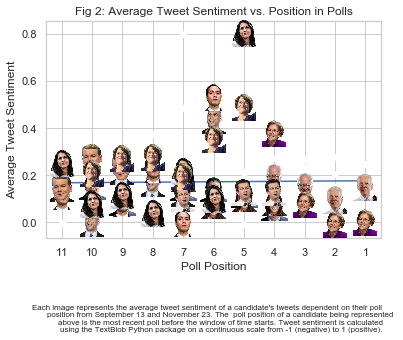

In [111]:
def getImage(path):
    if path == 'images/sanders.png':
        return OffsetImage(plt.imread(path), zoom = 0.02, interpolation='gaussian')
    elif path == 'images/bennet.png':
        return OffsetImage(plt.imread(path), zoom = 0.07, interpolation='gaussian')
    else:
        return OffsetImage(plt.imread(path), zoom = 0.08, interpolation='gaussian')

paths = ['images/bennet.png',
        'images/biden.png',
        'images/booker.png',
        'images/buttigieg.png',
        'images/castro.png',
        'images/gabbard.png',
        'images/harris.png',
        'images/klobuchar.png',
        'images/sanders.png',
        'images/warren.png',
        'images/yang.png']

x = pos_avg_sentiment['poll_position']
y = pos_avg_sentiment['sentiment']


fig, ax = plt.subplots()
ax.scatter(x, y, color = "white")
plt.xticks(np.arange(1, len(paths)+1, 1), np.arange(len(paths), 0, -1))

img_paths = {}
for i in most_recent_rankings:
    path_name = "images/" + i + ".png"
    img_paths[i] = getImage(path_name)

# for x0, y0, path in zip(x, y,paths):
for i in range(pos_avg_sentiment.shape[0]):
    cand_name = pos_avg_sentiment.loc[i].cand_name
    sent = pos_avg_sentiment.loc[i].sentiment
#     mentions = df.loc[i].other_mentions
    poll_pos = 12 - pos_avg_sentiment.loc[i].poll_position
    candidate_name = handle_to_last_name[cand_name.lower()]
#     path_name = "images/" + candidate_name + ".png"
#     ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False) # , box_alignment=(0.3,0.3))
    img = img_paths[candidate_name]
#     img.putalpha(128)
    ab = AnnotationBbox(img, (poll_pos, 
                            sent), frameon=False) # , box_alignment=(0.3,0.3))
    ax.add_artist(ab)

# plot line of best fit
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    
caption = """Each image represents the average tweet sentiment of a candidate's tweets dependent on their poll 
            position from September 13 and November 23. The  poll position of a candidate being represented 
            above is the most recent poll before the window of time starts. Tweet sentiment is calculated 
            using the TextBlob Python package on a continuous scale from -1 (negative) to 1 (positive)."""

plt.xlabel("Poll Position")
plt.ylabel("Average Tweet Sentiment")
plt.title("Fig 2: Average Tweet Sentiment vs. Position in Polls")
fig.text(.5, -.2, caption, ha='center', fontdict={'size': 8})


plt.savefig('my_figure_with_best_fit.pdf', bbox_inches='tight', dpi=400)

In [92]:
# model fit for above graph
x = pos_avg_sentiment['poll_position']
y = pos_avg_sentiment['sentiment']

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print(slope)
p_value

0.0008569932202020774


0.9099261986456195

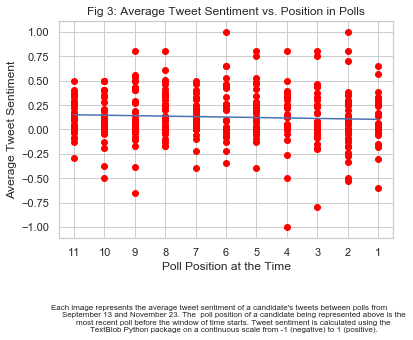

In [113]:
x = 12 - avg_sentiment_by_poll['poll_position']
y = avg_sentiment_by_poll['sentiment']

fig, ax = plt.subplots()
ax.scatter(x, y, color = "red")
plt.xticks(np.arange(1, len(paths)+1, 1), np.arange(len(paths), 0, -1))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

caption = """Each image represents the average tweet sentiment of a candidate's tweets between polls from 
            September 13 and November 23. The  poll position of a candidate being represented above is the
            most recent poll before the window of time starts. Tweet sentiment is calculated using the 
            TextBlob Python package on a continuous scale from -1 (negative) to 1 (positive)."""

plt.xlabel("Poll Position at the Time")
plt.ylabel("Average Tweet Sentiment")
plt.title("Fig 3: Average Tweet Sentiment vs. Position in Polls")
fig.text(.5, -.2, caption, ha='center', fontdict={'size': 8})

fig.savefig('dot_plot_avg_tweet_sentiment.pdf', bbox_inches='tight', dpi=400)

In [93]:
x = 12 - avg_sentiment_by_poll['poll_position']
y = avg_sentiment_by_poll['sentiment']
slope, intercept, r_value, p_value, std_err = linregress(x,y)
print(slope)
p_value

-0.004712668593997994


0.23106484142129874

In [21]:
pmm = pos_mode_mentions[pos_mode_mentions.other_mentions.apply(type) == type(pos_mode_mentions.loc[1].other_mentions)]
pmm

,cand_name,poll_position,other_mentions
0,AndrewYang,4.0,1
1,AndrewYang,5.0,1
2,AndrewYang,6.0,0
3,AndrewYang,7.0,1
5,AndrewYang,10.0,0
6,BernieSanders,2.0,0
7,BernieSanders,3.0,0
8,BernieSanders,4.0,0
9,CoryBooker,6.0,0
10,CoryBooker,7.0,0


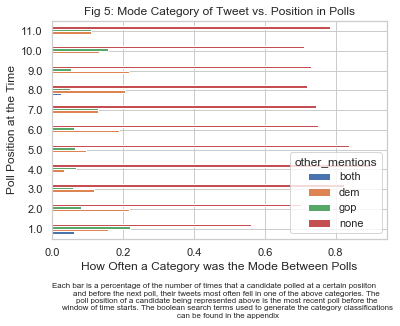

In [120]:
mmbp = mode_mentions_by_poll[mode_mentions_by_poll.other_mentions.apply(type) == type(mode_mentions_by_poll.loc[1].other_mentions)]
x = 12 - mmbp['poll_position']
x_pcts = mmbp.groupby(['poll_position', 'other_mentions']).agg({'cand_name': 'count'})
mention_dict = {0 : "none", 1 : "dem", 2: "gop", 3: "both"}
x_counts = mmbp.groupby(['poll_position'], as_index = False).agg({'cand_name': 'count'})

xmnnm = x_pcts.reset_index()
xmnnm = xmnnm[xmnnm.other_mentions != 0]
xmnnm.reset_index(drop = True, inplace = True)
xmnnm['other_mentions'] = xmnnm['other_mentions'].map(mention_dict)
xmnnm = xmnnm.groupby(['poll_position', 'other_mentions']).agg({'cand_name': 'count'})


# graph 1
x_pcts = x_pcts.groupby(level=0).apply(lambda x: x / float(x.sum()))
flat_df = x_pcts.reset_index()
flat_df['other_mentions'] = flat_df['other_mentions'].map(mention_dict)
plot = flat_df.pivot("poll_position", "other_mentions", "cand_name").plot(kind="barh")
fig = plot.get_figure()

caption = """Each bar is a percentage of the number of times that a candidate polled at a certain posiiton
            and before the next poll, their tweets most often fell in one of the above categories. The 
            poll position of a candidate being represented above is the most recent poll before the 
            window of time starts. The boolean search terms used to generate the category classifications
            can be found in the appendix"""

plt.ylabel("Poll Position at the Time")
plt.xlabel("How Often a Category was the Mode Between Polls")
plt.title("Fig 5: Mode Category of Tweet vs. Position in Polls")
fig.text(.5, -.15, caption, ha='center', fontdict={'size': 8})
fig.savefig('mode_category_box_plot.pdf', bbox_inches='tight', dpi=400)

# # graph 2
# xmnnm = xmnnm.groupby(level=0).apply(lambda x: x / float(x.sum()))
# flat_xmnnm = xmnnm.reset_index()
# flat_xmnnm.pivot("poll_position", "other_mentions", "cand_name").plot(kind='barh')

# plt.ylabel("Poll Position at the Time")
# plt.xlabel("Percentage of Times that a Category was the Mode after a poll")
# plt.title("Mode Category of Tweet vs. Position in Polls")
# fig.text(.5, -.2, caption, ha='center', fontdict={'size': 8})
# plt.show()

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats

In [121]:
dummy = pd.get_dummies(flat_df['other_mentions'])
y = flat_df['poll_position']
# regressor = LinearRegression()  
# regressor.fit(dummy, y)
X2 = sm.add_constant(dummy)
est = sm.OLS(y, X2)
print(est.fit().f_pvalue)

0.9454204670904834


C:\Users\pouya\Anaconda3\envs\candidate_tweet_analysis\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [124]:
avg_sentiment_by_poll

,cand_name,poll_date,poll_position,sentiment
0,AndrewYang,2019-09-17,6.0,-0.050000
1,AndrewYang,2019-09-17,7.0,0.000000
2,AndrewYang,2019-09-21,7.0,0.308333
3,AndrewYang,2019-09-22,6.0,0.250000
4,AndrewYang,2019-09-23,4.0,0.058333
...,...,...,...,...
396,ewarren,2019-11-10,3.0,-0.086061
397,ewarren,2019-11-12,1.0,-0.030952
398,ewarren,2019-11-17,3.0,0.065584
399,ewarren,2019-11-19,2.0,-0.033911


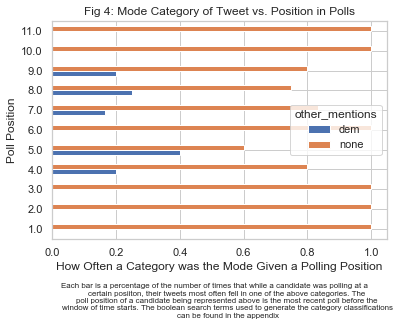

In [118]:
mmbp = pos_mode_mentions[pos_mode_mentions.other_mentions.apply(type) == type(mode_mentions_by_poll.loc[1].other_mentions)]
x = 12 - mmbp['poll_position']
x_pcts = mmbp.groupby(['poll_position', 'other_mentions']).agg({'cand_name': 'count'})
mention_dict = {0 : "none", 1 : "dem", 2: "gop", 3: "both"}
x_counts = mmbp.groupby(['poll_position'], as_index = False).agg({'cand_name': 'count'})

xmnnm = x_pcts.reset_index()
xmnnm = xmnnm[xmnnm.other_mentions != 0]
xmnnm.reset_index(drop = True, inplace = True)
xmnnm['other_mentions'] = xmnnm['other_mentions'].map(mention_dict)
xmnnm = xmnnm.groupby(['poll_position', 'other_mentions']).agg({'cand_name': 'count'})


# graph 1
x_pcts = x_pcts.groupby(level=0).apply(lambda x: x / float(x.sum()))
flat_df = x_pcts.reset_index()
flat_df['other_mentions'] = flat_df['other_mentions'].map(mention_dict)
plot = flat_df.pivot("poll_position", "other_mentions", "cand_name").plot(kind="barh")
fig = plot.get_figure()

caption = """Each bar is a percentage of the number of times that while a candidate was polling at a
            certain posiiton, their tweets most often fell in one of the above categories. The 
            poll position of a candidate being represented above is the most recent poll before the 
            window of time starts. The boolean search terms used to generate the category classifications
            can be found in the appendix"""

plt.ylabel("Poll Position")
plt.xlabel("How Often a Category was the Mode Given a Polling Position")
plt.title("Fig 4: Mode Category of Tweet vs. Position in Polls")
fig.text(.5, -.15, caption, ha='center', fontdict={'size': 8})
fig.savefig('mode_category_box_plot_total.pdf', bbox_inches='tight', dpi=400)

# # graph 2
# xmnnm = xmnnm.groupby(level=0).apply(lambda x: x / float(x.sum()))
# flat_xmnnm = xmnnm.reset_index()
# flat_xmnnm.pivot("poll_position", "other_mentions", "cand_name").plot(kind='barh')

# plt.ylabel("Poll Position at the Time")
# plt.xlabel("Percentage of Times that a Category was the Mode after a poll")
# plt.title("Mode Category of Tweet vs. Position in Polls")
# fig.text(.5, -.2, caption, ha='center', fontdict={'size': 8})
# plt.show()

In [110]:
dummy = pd.get_dummies(flat_df['other_mentions'])
y = flat_df['poll_position']
# regressor = LinearRegression()  
# regressor.fit(dummy, y)
X2 = sm.add_constant(dummy)
est = sm.OLS(y, X2)
print(est.fit().f_pvalue)

0.7176071663055399


C:\Users\pouya\Anaconda3\envs\candidate_tweet_analysis\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [32]:
import seaborn as sns

In [38]:
x_means

,poll_position,other_mentions,cand_name
0,1.0,none,18
1,1.0,dem,5
2,1.0,gop,7
3,1.0,both,2
4,2.0,none,26
5,2.0,dem,8
6,2.0,gop,3
7,3.0,none,28
8,3.0,dem,4
9,3.0,gop,2


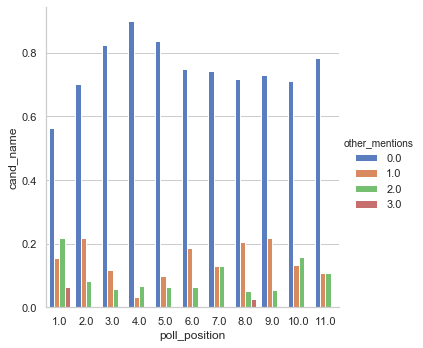

In [45]:

sns.set(style="whitegrid")
g = sns.factorplot(x="poll_position", y="cand_name", hue="other_mentions", data=flat_df, kind="bar", palette="muted")

In [ ]:
# model fit for above graph
x_amy = x.copy()
del x_amy[3]
y_amy = y.copy()
del y_amy[3]
slope, intercept, r_value, p_value, std_err = linregress(x,y)
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x_amy,y_amy)

In [ ]:
slope1

In [ ]:
from scipy.stats import iqr, linregress

In [ ]:
# outlier check for above graph
# q3 = np.quantile(y, 0.75)
# iqr = iqr(y)
for i in range(len(y)):
    if y[i] < 0:
        print(i)
        
print(y[-1])
    

In [ ]:
# import gensim
# import gensim.corpora as corpora
# from gensim.utils import simple_preprocess
# from gensim.models import CoherenceModel

# # spacy for lemmatization
# import spacy

# # Plotting tools
# import pyLDAvis
# import pyLDAvis.gensim  # don't skip this
# import matplotlib.pyplot as plt
# %matplotlib inline

In [ ]:
# lem_data = []
    
# def get_global_topics(cand):
#     global tweets
#     global lem_data
#     lem_data.append([list()])
#     cand_t = tweets[cand]
#     num_counted = float(0)
#     for i in range(len(cand_t)):
#         if not (cand_t[i]._clean_text).count(" ") < 15:
#             lem_data[-1] = lem_data[-1] + cand_t[i].data_lemmatized
#     temp = []
#     for i in lem_data[-1]:
#         temp = temp + i
#     lem_data[-1] = temp
#     return lem_data[-1]

# texts = [[]]
# dct = corpora.Dictionary(texts)  # initialize a Dictionary
# for i in tweets:
#     temp = get_global_topics(i)
#     dct.add_documents([temp])  # add more document (extend the vocabulary)
# #     get_global_topics(i)


# # id2word = corpora.Dictionary(lem_data)

# # Create Corpus
# ts = dct

# # Term Document Frequency
# corpus = [dct.doc2bow(text) for text in ts]
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                    id2word=id2word,
#                                    num_topics=10, 
#                                    random_state=100,
#                                    update_every=1,
#                                    chunksize=100,
#                                    passes=10,
#                                    alpha='auto',
#                                    per_word_topics=False)